In [4]:
from __future__ import print_function, division
from builtins import range
import os
import requests
import zipfile
import numpy as np
import pandas as pd
from scipy.misc.pilutil import imread, imsave, imresize
from glob import glob
from tqdm import tqdm
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn

In [5]:
def clamp_sample(x):
    x = np.minimum(x, 1)
    x = np.maximum(x, 0)
    return x

In [12]:
class BayesClassifier:
    def fit(self, X, Y):
        # assume classes are numbered 0...k-1
        self.K = len(set(Y))
        
        self.gaussians = []
        self.p_y = np.zeros(self.K)
        for k in range(self.K):
            Xk = X[Y == k]
            self.p_y[k] = len(Xk)
            mean = Xk.mean(axis=0)
            cov = np.cov(Xk.T)
            g = {'m':mean, 'c': cov}
            self.gaussians.append(g)
        # normalize
        self.p_y /= self.p_y.sum()
        
    def sample_given_y(self, y):
        g = self.gaussians[y]
        return clamp_sample(mvn.rvs(mean=g['m'], cov=g['c']))
    
    def sample(self):
        y = np.random.choice(self.K, p = self.p_y)
        return clamp_sample(self.sample_given_y(y))

In [13]:
def get_mnist(limit=None):
    if not os.path.exists('Dataset'):
        print("You must create a folder called large_files adjacent to the class folder first.")
    if not os.path.exists('Dataset/train.csv'):
        print("Looks like you haven't downloaded the data or it's not in the right spot.")
        print("Please get train.csv from https://www.kaggle.com/c/digit-recognizer")
        print("and place it in the large_files folder.")
        
    print("Reading in and transforming data..")
    df = pd.read_csv('Dataset/train.csv')
    data = df.values
    X = data[:, 1:] / 255.0 # data is from 0..255
    Y = data[:, 0]
    X, Y = shuffle(X, Y)
    if limit is not None:
        X, Y = X[:limit], Y[:limit]
    return X, Y


Reading in and transforming data..


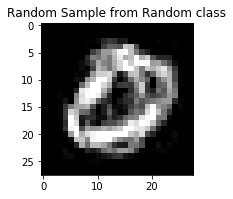

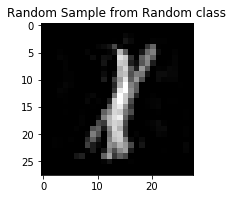

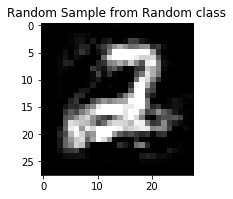

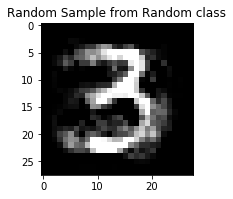

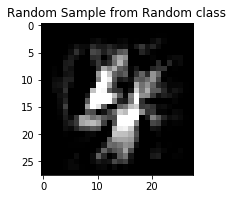

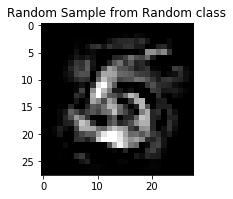

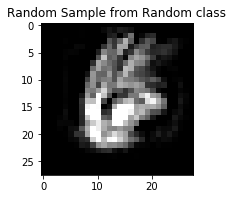

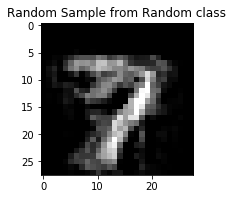

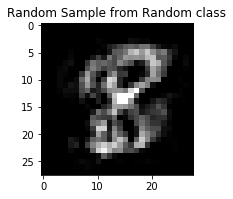

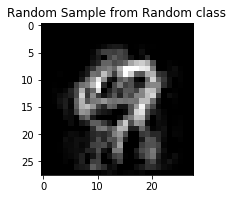

In [14]:
if __name__ == '__main__':
    X, Y = get_mnist()
    clf = BayesClassifier()
    clf.fit(X,Y)
    
    for k in range(clf.K):
        # show one sample for each class and mean image learned
        
        sample = clf.sample_given_y(k).reshape(28,28)
        mean = clf.gaussians[k]['m'].reshape(28,28)
        
        plt.subplot(1,2,1)
        plt.imshow(sample, cmap='gray')
        plt.title("Random Sample from Random class")
        plt.show()